# Importing Dependencies

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Import Datasets

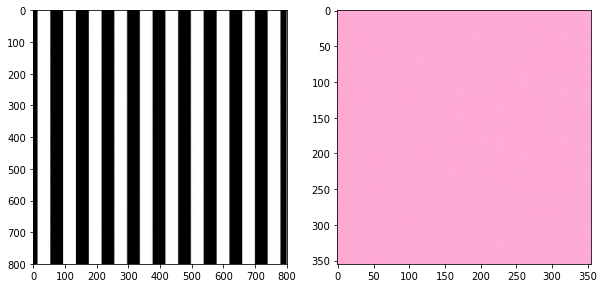

In [5]:
# Read the images
image_stripes = cv2.imread('images/stripes.jpg')
image_stripes = cv2.cvtColor(image_stripes , cv2.COLOR_BGR2RGB)

image_solid = cv2.imread('images/pink_solid.jpg')
image_solid = cv2.cvtColor(image_solid , cv2.COLOR_BGR2RGB)

# Display the images
f , (ax1 , ax2) = plt.subplots(1 , 2 , figsize = (10 , 5))

ax1.imshow(image_stripes)
ax2.imshow(image_solid)

In [9]:
# Cvt to greyscale to focus on the intensity patterns
gray_stripes = cv2.cvtColor(image_stripes , cv2.COLOR_RGB2GRAY)
gray_solid = cv2.cvtColor(image_solid , cv2.COLOR_RGB2GRAY)

# Normalize the image values from [0 , 255] to [0 , 1]
norm_stripes = gray_stripes/255.0
norm_solid = gray_solid/255.0

# Perform a fast fourier transform and create a scaled , frequency transform image
def ft_image(norm_image):
    f = np.fft.fft2(norm_image)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift))
    
    return frequency_tx

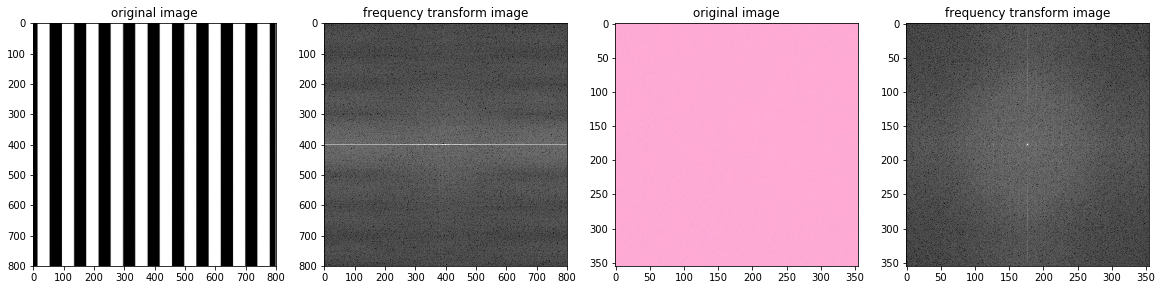

In [10]:
f_stripes = ft_image(norm_stripes)
f_solid = ft_image(norm_solid)

f , (ax1 , ax2 , ax3 , ax4) = plt.subplots(1 , 4 , figsize = (20 , 10))

ax1.set_title('original image')
ax1.imshow(image_stripes)
ax2.set_title('frequency transform image')
ax2.imshow(f_stripes, cmap='gray')

ax3.set_title('original image')
ax3.imshow(image_solid)
ax4.set_title('frequency transform image')
ax4.imshow(f_solid, cmap='gray')

# Real world implementation

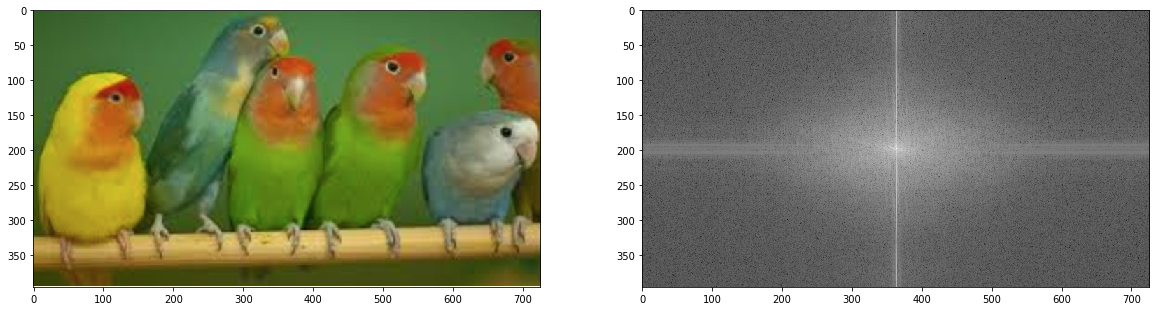

In [11]:
# Read the image
image = cv2.imread('images/birds.jpg')
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image , cv2.COLOR_RGB2GRAY)
norm_image = gray/255.0
f_image = ft_image(norm_image)

# Display the image
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image)
ax2.imshow(f_image, cmap='gray')